# CPU vs GPU Training Time Comparison with TensorFlow

This project demonstrates a comparison of training times for a ResNet50 model on the CIFAR-10 dataset using TensorFlow, running on both CPU and GPU. 

In [1]:
!nvidia-smi

Thu Jan 23 02:35:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8              2W /  175W |     149MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# ResNet50 Model
def create_resnet_model(device):
    with tf.device(device):
        base_model = tf.keras.applications.ResNet50(
            include_top=False,
            weights='imagenet',  # Use pre-trained ImageNet weights
            input_shape=(32, 32, 3),
            pooling='avg'
        )
        model = models.Sequential([
            base_model,
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model
# Train the model and capture metrics
def train_and_time(model, device, epochs=1, batch_size=128):
    print(f"Training on {device}:")
    with tf.device(device):
        start_time = time.time()
        history = model.fit(x_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(x_test, y_test),
                            verbose=1)
        training_time = time.time() - start_time
    return history, training_time

# Create the model
model_cpu = create_resnet_model('/CPU:0')
model_gpu = create_resnet_model('/GPU:0')

2025-01-23 02:37:34.110939: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-23 02:37:34.136296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737580054.168805   32917 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737580054.177444   32917 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 02:37:34.205948: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [10]:
print("Available devices:", tf.config.list_physical_devices())

Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
# Train on CPU
history_cpu, cpu_time = train_and_time(model_cpu, '/CPU:0')

Training on /CPU:0:
391/391 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.4868 - loss: 1.6289 - val_accuracy: 0.1000 - val_loss: 5.4332


In [12]:
# Train on GPU
history_gpu, gpu_time = train_and_time(model_gpu, '/GPU:0')

Training on /GPU:0:


2025-01-23 02:13:38.450833: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20759', 28 bytes spill stores, 28 bytes spill loads

2025-01-23 02:13:38.835535: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16362_0', 744 bytes spill stores, 692 bytes spill loads

2025-01-23 02:13:38.900834: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16362', 220 bytes spill stores, 576 bytes spill loads



390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4517 - loss: 1.7124

2025-01-23 02:14:30.594822: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16362', 4 bytes spill stores, 4 bytes spill loads

2025-01-23 02:14:31.866797: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20759', 8 bytes spill stores, 8 bytes spill loads

2025-01-23 02:14:32.078898: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20759', 4 bytes spill stores, 4 bytes spill loads

2025-01-23 02:14:32.220458: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_20759', 64 bytes spill stores, 64 bytes spill loads

2025-01-23 02:14:32.222027: I external/local_xla/xla/stream_ex

391/391 ━━━━━━━━━━━━━━━━━━━━ 156s 176ms/step - accuracy: 0.4524 - loss: 1.7103 - val_accuracy: 0.1003 - val_loss: 4.1501



CPU Training Time: 607.80 seconds
GPU Training Time: 144.60 seconds


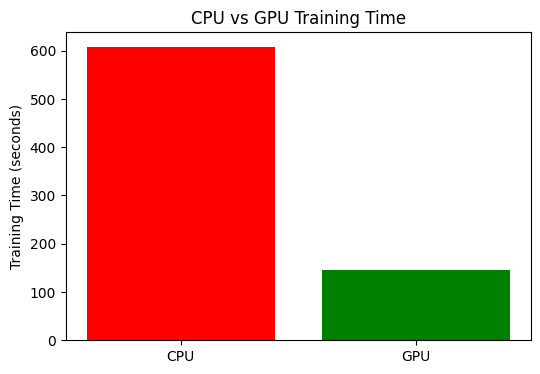

In [ ]:
# Plot Training Time Comparison
def plot_training_time(cpu_time, gpu_time):
    plt.figure(figsize=(6, 4))
    devices = ['CPU', 'GPU']
    times = [cpu_time, gpu_time]
    plt.bar(devices, times, color=['red', 'green'])
    plt.ylabel("Training Time (seconds)")
    plt.title("CPU vs GPU Training Time")
    plt.show()

# Visualizations
print(f"\nCPU Training Time: {cpu_time:.2f} seconds")
print(f"GPU Training Time: {gpu_time:.2f} seconds")

plot_training_time(cpu_time, gpu_time)